1. 데이터를 불러오기

2. 데이터를 불러와서 Numpy array 형태로 데이터를 만드시면 됩니다
Image (224, 224, 3) -> (1000, 224, 224, 3) X
Label 고양이 개 비행기
Label 0      1    2
Label (1) -> (1000, 1) y

3. 데이터 전처리

4. (필요하다면) 데이터 증강 Data Augmentation

5. 모델 선정

6. 학습

7. 예측

In [ ]:
# TensorFlow와 필요한 라이브러리 불러오기
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# 기본 데이터셋 로드 (Fashion MNIST)
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images, train_labels = train_images[:5000], train_labels[:5000]
test_images, test_labels = test_images[:1000], test_labels[:1000]

# 클래스명 정의
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
# 데이터 정규화 (0~255 픽셀값을 0~1 범위로 변경) -1 ~ 1 / -3 ~ 3
train_images = train_images / 255.0
test_images = test_images / 255.0

# 데이터 형태 확인
print(train_images.shape)  # (60000, 28, 28)

(5000, 28, 28)


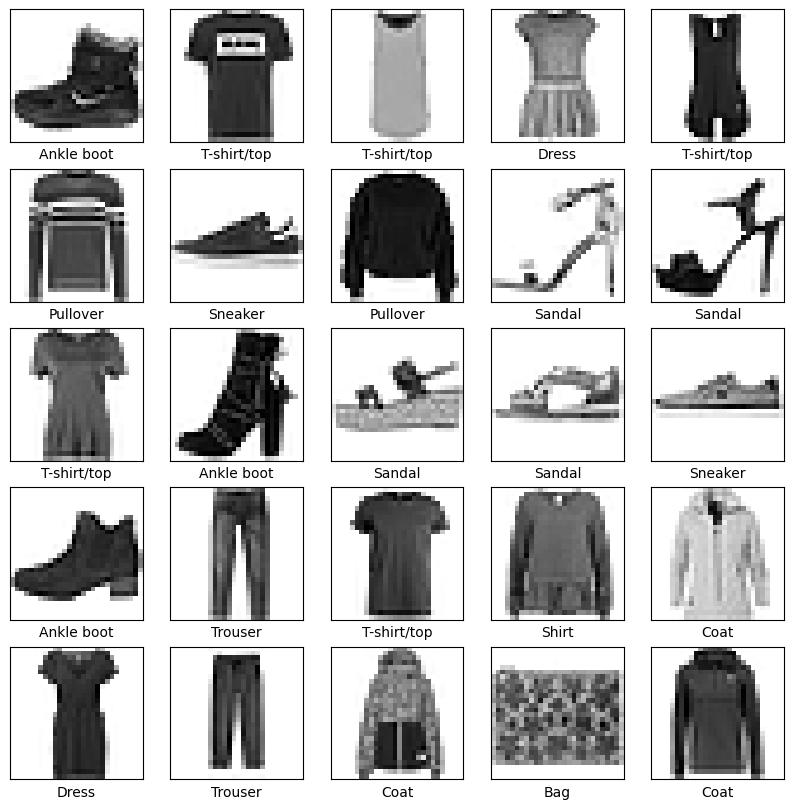

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = models.Sequential([
    layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape (Reshape)                    │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.5170 - loss: 1.3911 - val_accuracy: 0.7430 - val_loss: 0.7071
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.7778 - loss: 0.5958 - val_accuracy: 0.8040 - val_loss: 0.5686
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.8134 - loss: 0.5017 - val_accuracy: 0.8000 - val_loss: 0.5334
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.8373 - loss: 0.4459 - val_accuracy: 0.8310 - val_loss: 0.4654
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.8540 - loss: 0.4091 - val_accuracy: 0.8280 - val_loss: 0.4808
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.8623 - loss: 0.3748 - val_accuracy: 0.8470 - val_loss: 0.4819
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.8783 - loss: 0.3430 - val_accuracy: 0.8600 - val_loss: 0.4287
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.8929 - loss: 0.3073 - val_ac

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# EarlyStopping 설정: 3 epoch 동안 성능 개선 없으면 중단
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# ModelCheckpoint 설정: 최적의 모델 저장
checkpoint = ModelCheckpoint('best_model.keras',
                             monitor='val_loss',
                             save_best_only=True,
                             verbose=1)

In [ ]:
history = model.fit(
    train_rgb, train_labels,
    epochs=20,
    validation_split=0.1,
    callbacks=[early_stop, checkpoint]
)

In [ ]:
# 최적의 모델 다시 로드하기
best_model = tf.keras.models.load_model('best_model.keras')

# 로드한 모델 평가
loss, acc = best_model.evaluate(test_rgb, test_labels)
print(f"Best model accuracy: {acc:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


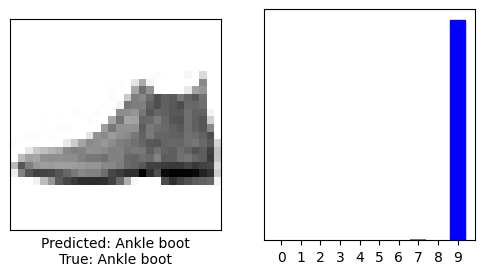

In [ ]:
predictions = model.predict(test_images)

# 첫 번째 이미지의 예측 결과 확인
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(test_images[0], cmap=plt.cm.binary)

predicted_label = np.argmax(predictions[0])
true_label = test_labels[0]

plt.xlabel(f"Predicted: {class_names[predicted_label]}\nTrue: {class_names[true_label]}")

plt.subplot(1,2,2)
plt.grid(False)
plt.xticks(range(10))
plt.yticks([])
bar_plot = plt.bar(range(10), predictions[0], color="#777777")
bar_plot[predicted_label].set_color('red')
bar_plot[true_label].set_color('blue')
plt.show()
